# Generating a set of gravity data for a model

#### Import libraries

In [1]:
%matplotlib inline
from IPython.display import Markdown as md
from IPython.display import display as dp
import string as st
import sys
import numpy as np
import matplotlib.pyplot as plt
import cPickle as pickle
import datetime

from fatiando.utils import ang2vec, vec2ang
from fatiando.mesher import Sphere, Prism,PolygonalPrism
from fatiando.gravmag import sphere,prism, polyprism

/home/andrelreis/anaconda3/envs/py2/lib/python2.7/site-packages/fatiando/vis/mpl.py:76: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")


In [2]:
notebook_name = 'synthetic_data.ipynb'

#### Plot style

In [3]:
plt.style.use('ggplot')

#### Loading properties of a set of geometrical objects

In [4]:
with open('data/model_multi.pickle') as f:
        model_multi = pickle.load(f)

#### Loading the grid parameters

In [5]:
with open('data/airborne_survey.pickle') as f:
        airborne = pickle.load(f)

#### Constructing a dictionary

In [6]:
data_set = dict()

#### List of saved files

In [7]:
saved_files = []

### For Airborne survey

#### Observation area

In [8]:
print 'Area limits: \n x_max = %.1f m \n x_min = %.1f m \n y_max = %.1f m \n y_min = %.1f m' % (airborne['area'][1],airborne['area'][0],
                                                                                                airborne['area'][3],airborne['area'][2])

Area limits: 
 x_max = 5500.0 m 
 x_min = -6500.0 m 
 y_max = 6500.0 m 
 y_min = -5500.0 m


#### Airborne survey information

In [9]:
print 'Shape : (%.0f,%.0f)'% airborne['shape'] 
print 'Number of data: %.1f' % airborne['N']
print 'dx: %.1f m' % airborne['dx']
print 'dy: %.1f m ' % airborne['dy']
print 'Height: %.1f m' % airborne['z_obs']

Shape : (49,25)
Number of data: 1225.0
dx: 250.0 m
dy: 500.0 m 
Height: -100.0 m


#### Calculating the data

In [10]:
data_set['gz_airb_poly'] = polyprism.gz(airborne['x'],airborne['y'],airborne['z'],model_multi['polygons'])

In [11]:
data_set['gz_airb_sph'] = sphere.gz(airborne['x'],airborne['y'],airborne['z'],model_multi['spheres'])

In [12]:
data_set['gz_airb_pri'] = prism.gz(airborne['x'],airborne['y'],airborne['z'],model_multi['prisms'])

In [13]:
data_set['gz_airb'] = data_set['gz_airb_poly'] + data_set['gz_airb_sph'] + data_set['gz_airb_pri']

##### Generating noise for the data set w/ remanet magnetization presence

In [14]:
np.random.seed(seed=40)

In [15]:
std_noise = 0.000000000001
r = np.random.normal(0.0,std_noise, airborne['Nx']*airborne['Ny'])
data_set['gz_obs_airb'] =  data_set['gz_airb'] + r

#### Visualization of Total Field Anomaly for airborne survey w/ the presence of Remanent magnetization in a polyprism

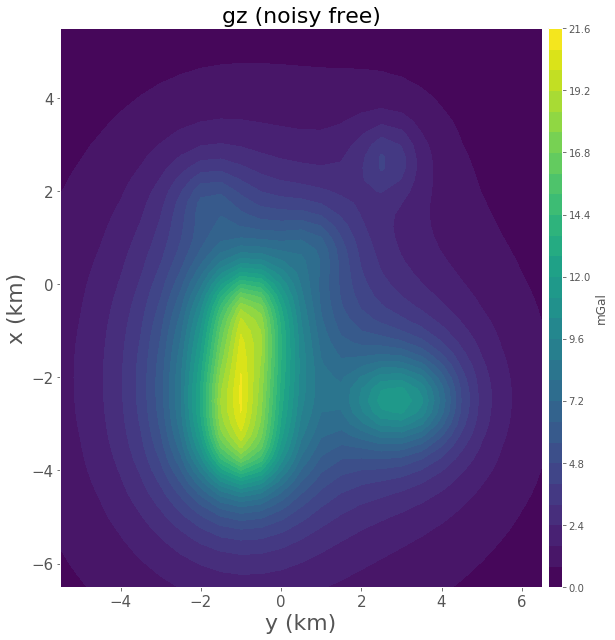

In [20]:
title_font = 22
bottom_font = 20
saturation_factor = 1.
plt.close('all')
plt.figure(figsize=(9,9), tight_layout=True)

plt.contourf(1e-3*airborne['y'].reshape(airborne['shape']), 
             1e-3*airborne['x'].reshape(airborne['shape']),
             data_set['gz_obs_airb'].reshape(airborne['shape']), 
             30, cmap='viridis')
plt.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('mGal')
plt.xlabel('y (km)', fontsize = title_font)
plt.ylabel('x (km)', fontsize = title_font)
plt.title('gz (noisy free)', fontsize=title_font)
plt.tick_params(labelsize=15)

file_name = 'images/noisy_free_data_gz_airborne_multi'
plt.savefig(file_name+'.png',dpi=300)
saved_files.append(file_name+'.png')

plt.show()

#### Generating .pickle file

In [17]:
now = datetime.datetime.utcnow().strftime('%d %B %Y %H:%M:%S UTC')
data_set['metadata'] = 'Generated by {name} on {date}'.format(date=now, name=notebook_name)

In [18]:
file_name = 'data/data_set.pickle'
with open(file_name, 'w') as f:
    pickle.dump(data_set, f)
    
saved_files.append(file_name)


## Saved files

In [19]:
with open('reports/report_%s.md' % notebook_name[:st.index(notebook_name, '.')], 'w') as q:
    q.write('# Saved files \n')
    now = datetime.datetime.utcnow().strftime('%d %B %Y %H:%M:%S UTC')
    header = 'Generated by {name} on {date}'.format(date=now, name=notebook_name)
    q.write('\n\n'+header+'\n\n')
    for i, sf in enumerate(saved_files):
        print '%d  %s' % (i+1,sf)
        q.write('*  `%s` \n' % (sf))

1  images/noisy_free_data_gz_airborne_multi.png
2  data/data_set.pickle
